In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

Using TensorFlow backend.


In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [17]:
test = get_data('chest_xray/test3')

<AxesSubplot:ylabel='count'>

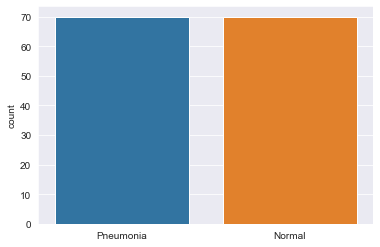

In [18]:
graph = []
for i in test:
    if(i[1] == 0):
        graph.append("Pneumonia")
    else:
        graph.append("Normal")
sns.set_style('darkgrid')
sns.countplot(graph)      


In [19]:
x_test = []
y_test = []

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [20]:
x_test = np.array(x_test) / 255
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [21]:
reconstructed_model = keras.models.load_model("best_model1")

In [22]:
predictions2 = reconstructed_model.predict_classes(x_test)
predictions2 = predictions2.reshape(1,-1)[0]
predictions2[:15]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [23]:
print(classification_report(y_test, predictions2, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.93      0.94        70
   Normal (Class 1)       0.93      0.94      0.94        70

           accuracy                           0.94       140
          macro avg       0.94      0.94      0.94       140
       weighted avg       0.94      0.94      0.94       140



<AxesSubplot:>

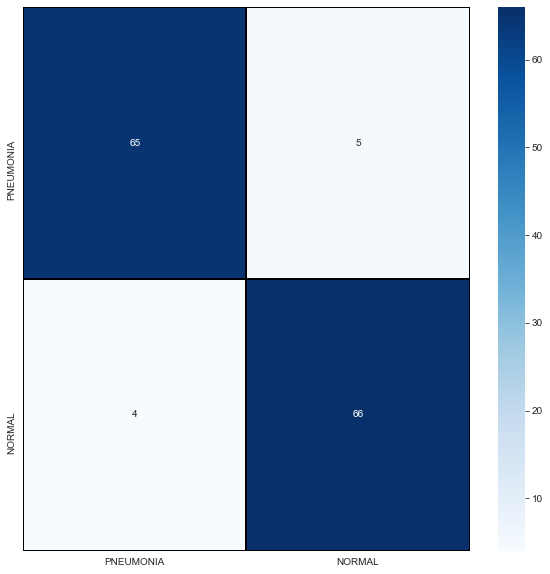

In [24]:
cm2= confusion_matrix(y_test,predictions2)
cm2 = pd.DataFrame(cm2 , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)